## lets transform the circle data with the help of polynomial kernels 

Great! Let’s derive a **kernel function $k(x, x')$** whose feature map is exactly:

$$
\phi(x, y) = \left( x,\, y,\, x^2 + y^2 \right)
$$

---

### 🔍 Step-by-step:

Let’s define:

$$
\phi(x) = \begin{bmatrix} x_1 \\ x_2 \\ x_1^2 + x_2^2 \end{bmatrix}
\quad \text{and} \quad
\phi(x') = \begin{bmatrix} x_1' \\ x_2' \\ {x_1'}^2 + {x_2'}^2 \end{bmatrix}
$$

Then, compute the **inner product**:

$$
k(x, x') = \langle \phi(x), \phi(x') \rangle = x_1 x_1' + x_2 x_2' + (x_1^2 + x_2^2)(x_1'^2 + x_2'^2)
$$

So the **kernel function** is:

$$
\boxed{
k(x, x') = \langle x, x' \rangle + \|x\|^2 \cdot \|x'\|^2
}
$$

Where:

* $\langle x, x' \rangle = x_1 x_1' + x_2 x_2'$
* $\|x\|^2 = x_1^2 + x_2^2$

---

### ✅ Summary:

You now have a custom kernel:

$$
\boxed{
k(x, x') = x^\top x' + \|x\|^2 \cdot \|x'\|^2
}
$$

whose feature map is:

$$
\boxed{
\phi(x) = (x_1,\, x_2,\, x_1^2 + x_2^2)
}
$$

---

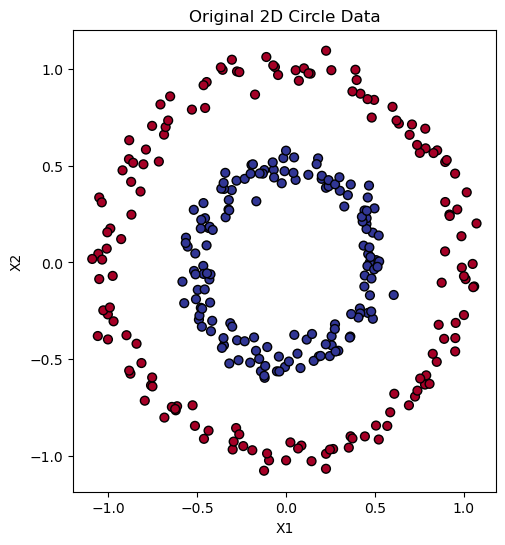

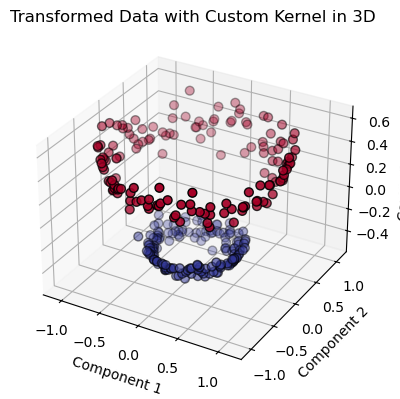

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate concentric circles data
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

# Step 2: Define the custom kernel function
def custom_kernel(X, X_prime):
    return np.dot(X, X_prime.T) + np.sum(X**2, axis=1).reshape(-1, 1) * np.sum(X_prime**2, axis=1)

# Step 3: Compute the kernel matrix (apply the custom kernel)
K = custom_kernel(X, X)

# Step 4: Perform KernelPCA to reduce the dimensionality to 3D using the custom kernel
kpca = KernelPCA(kernel='precomputed', n_components=3)  # Reduce to 3D
X_kpca_3d = kpca.fit_transform(K)

# Step 5: Plotting the original data in 2D
plt.figure(figsize=(12, 6))

# Plot original 2D data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=40, edgecolors='k')
plt.title("Original 2D Circle Data")
plt.xlabel("X1")
plt.ylabel("X2")

# Step 6: Plotting the transformed data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_kpca_3d[:, 0], X_kpca_3d[:, 1], X_kpca_3d[:, 2], c=y, cmap=plt.cm.RdYlBu, s=40, edgecolors='k')
ax.set_title("Transformed Data with Custom Kernel in 3D")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

plt.show()


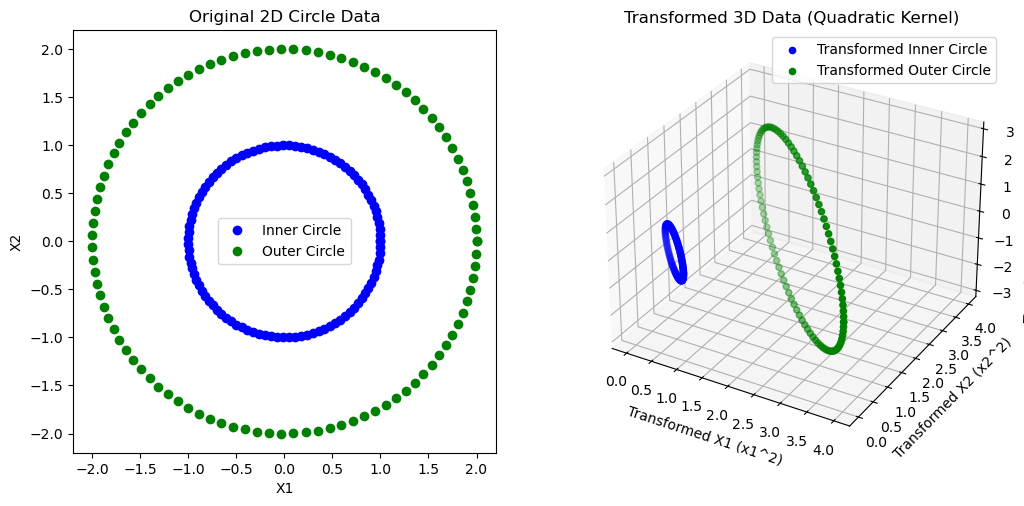

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate data for two concentric circles
np.random.seed(42)
num_points = 100
theta1 = np.linspace(0, 2 * np.pi, num_points)
theta2 = np.linspace(0, 2 * np.pi, num_points)

# Inner circle (radius = 1)
x1_1 = np.cos(theta1)
x2_1 = np.sin(theta1)

# Outer circle (radius = 2)
x1_2 = 2 * np.cos(theta2)
x2_2 = 2 * np.sin(theta2)

# Apply the quadratic kernel transformation
def quadratic_kernel_transform(x1, x2):
    return np.array([x1**2, x2**2, np.sqrt(2) * x1 * x2])

# Apply transformation to both circles
transformed_data_1 = np.array([quadratic_kernel_transform(x1_1[i], x2_1[i]) for i in range(num_points)])
transformed_data_2 = np.array([quadratic_kernel_transform(x1_2[i], x2_2[i]) for i in range(num_points)])

# Extract the transformed data for each circle
transformed_x1_1 = transformed_data_1[:, 0]
transformed_x2_1 = transformed_data_1[:, 1]
transformed_x3_1 = transformed_data_1[:, 2]

transformed_x1_2 = transformed_data_2[:, 0]
transformed_x2_2 = transformed_data_2[:, 1]
transformed_x3_2 = transformed_data_2[:, 2]

# Plot the original 2D circle data
fig = plt.figure(figsize=(12, 8))

# Plot original data in 2D
ax1 = fig.add_subplot(121)
ax1.plot(x1_1, x2_1, 'bo', label='Inner Circle')
ax1.plot(x1_2, x2_2, 'go', label='Outer Circle')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Original 2D Circle Data')
ax1.set_aspect('equal', 'box')
ax1.legend()

# Plot transformed data in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(transformed_x1_1, transformed_x2_1, transformed_x3_1, c='b', label='Transformed Inner Circle')
ax2.scatter(transformed_x1_2, transformed_x2_2, transformed_x3_2, c='g', label='Transformed Outer Circle')
ax2.set_xlabel('Transformed X1 (x1^2)')
ax2.set_ylabel('Transformed X2 (x2^2)')
ax2.set_zlabel('Transformed X3 (sqrt(2) * x1 * x2)')
ax2.set_title('Transformed 3D Data (Quadratic Kernel)')
ax2.legend()

plt.show()


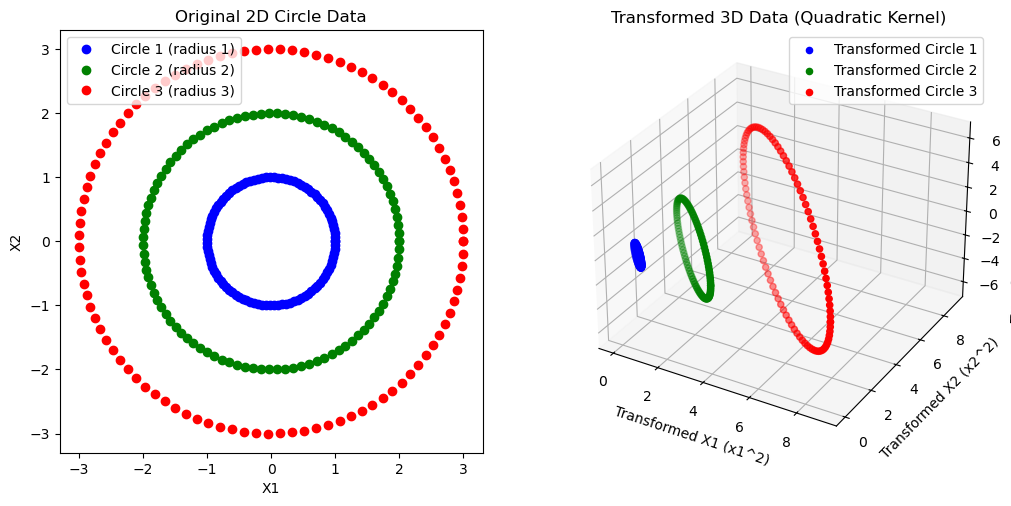

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate data for three concentric circles
np.random.seed(42)
num_points = 100
theta = np.linspace(0, 2 * np.pi, num_points)

# Radii for three circles
radii = [1, 2, 3]

# Create the circles
x1_1 = radii[0] * np.cos(theta)
x2_1 = radii[0] * np.sin(theta)

x1_2 = radii[1] * np.cos(theta)
x2_2 = radii[1] * np.sin(theta)

x1_3 = radii[2] * np.cos(theta)
x2_3 = radii[2] * np.sin(theta)

# Apply the quadratic kernel transformation
def quadratic_kernel_transform(x1, x2):
    return np.array([x1**2, x2**2, np.sqrt(2) * x1 * x2])

# Apply transformation to the three circles
transformed_data_1 = np.array([quadratic_kernel_transform(x1_1[i], x2_1[i]) for i in range(num_points)])
transformed_data_2 = np.array([quadratic_kernel_transform(x1_2[i], x2_2[i]) for i in range(num_points)])
transformed_data_3 = np.array([quadratic_kernel_transform(x1_3[i], x2_3[i]) for i in range(num_points)])

# Extract the transformed data for each circle
transformed_x1_1 = transformed_data_1[:, 0]
transformed_x2_1 = transformed_data_1[:, 1]
transformed_x3_1 = transformed_data_1[:, 2]

transformed_x1_2 = transformed_data_2[:, 0]
transformed_x2_2 = transformed_data_2[:, 1]
transformed_x3_2 = transformed_data_2[:, 2]

transformed_x1_3 = transformed_data_3[:, 0]
transformed_x2_3 = transformed_data_3[:, 1]
transformed_x3_3 = transformed_data_3[:, 2]

# Plot the original 2D circle data
fig = plt.figure(figsize=(12, 8))

# Plot original data in 2D
ax1 = fig.add_subplot(121)
ax1.plot(x1_1, x2_1, 'bo', label='Circle 1 (radius 1)')
ax1.plot(x1_2, x2_2, 'go', label='Circle 2 (radius 2)')
ax1.plot(x1_3, x2_3, 'ro', label='Circle 3 (radius 3)')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Original 2D Circle Data')
ax1.set_aspect('equal', 'box')
ax1.legend()

# Plot transformed data in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(transformed_x1_1, transformed_x2_1, transformed_x3_1, c='b', label='Transformed Circle 1')
ax2.scatter(transformed_x1_2, transformed_x2_2, transformed_x3_2, c='g', label='Transformed Circle 2')
ax2.scatter(transformed_x1_3, transformed_x2_3, transformed_x3_3, c='r', label='Transformed Circle 3')
ax2.set_xlabel('Transformed X1 (x1^2)')
ax2.set_ylabel('Transformed X2 (x2^2)')
ax2.set_zlabel('Transformed X3 (sqrt(2) * x1 * x2)')
ax2.set_title('Transformed 3D Data (Quadratic Kernel)')
ax2.legend()

plt.show()


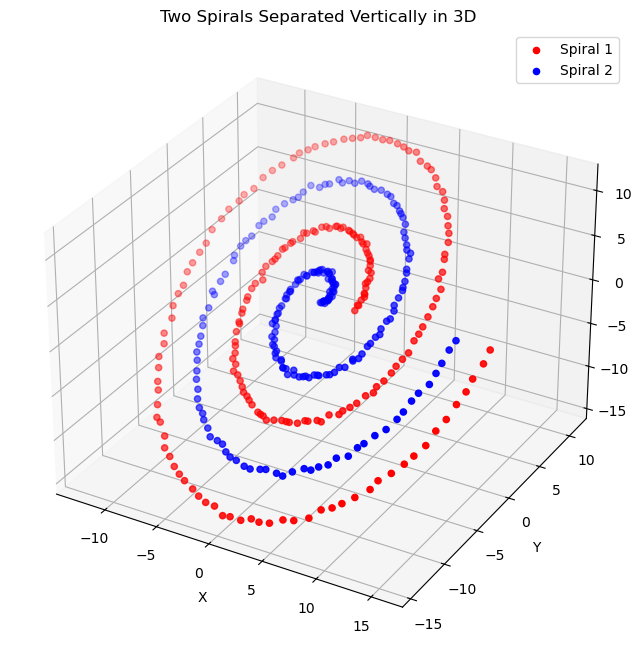

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate two spiral datasets in 2D (as before)
def generate_spiral_data(num_points=200, noise=0.1):
    theta = np.linspace(0, 4 * np.pi, num_points)
    r1 = theta + np.pi  # First spiral
    r2 = theta          # Second spiral

    # Add some noise to the spirals
    x1 = r1 * np.cos(theta) + noise * np.random.randn(num_points)
    y1 = r1 * np.sin(theta) + noise * np.random.randn(num_points)
    
    x2 = r2 * np.cos(theta) + noise * np.random.randn(num_points)
    y2 = r2 * np.sin(theta) + noise * np.random.randn(num_points)

    # Combine the data into a single array and label them
    X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
    y = np.hstack((np.zeros(num_points), np.ones(num_points)))

    return X, y

# Generate two spirals
X, y = generate_spiral_data()

# Add a third dimension (Z-axis) for separation along the vertical axis
X_3D = np.vstack((
    np.column_stack((X[:200], X[:200, 1], np.ones(200)*5)),  # Spiral 1, Z=5
    np.column_stack((X[200:], X[200:, 1], np.ones(200)*-5))  # Spiral 2, Z=-5
))

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each spiral in different color with no overlap
ax.scatter(X_3D[:200, 0], X_3D[:200, 1], X_3D[:200, 2], color='r', label="Spiral 1")
ax.scatter(X_3D[200:, 0], X_3D[200:, 1], X_3D[200:, 2], color='b', label="Spiral 2")

# Labeling
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Two Spirals Separated Vertically in 3D')
plt.legend()
plt.show()


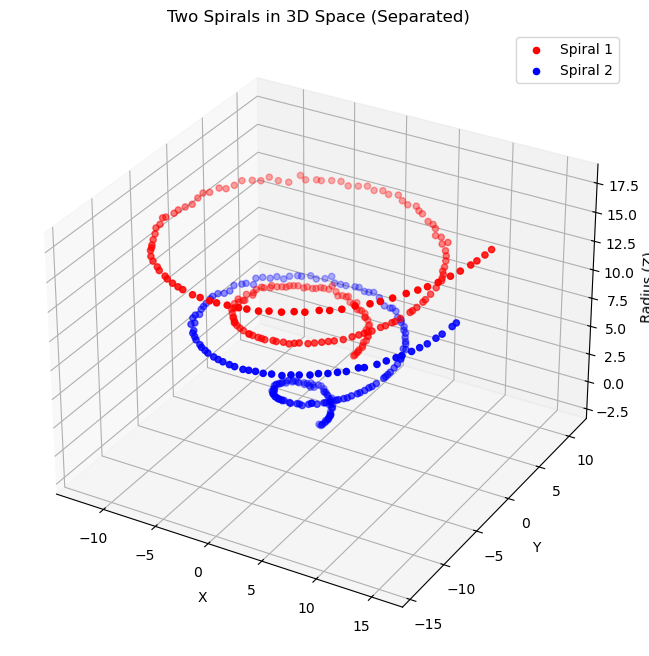

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate two spiral datasets in 2D (as before)
def generate_spiral_data(num_points=200, noise=0.1):
    theta = np.linspace(0, 4 * np.pi, num_points)
    r1 = theta + np.pi  # First spiral
    r2 = theta          # Second spiral

    # Add some noise to the spirals
    x1 = r1 * np.cos(theta) + noise * np.random.randn(num_points)
    y1 = r1 * np.sin(theta) + noise * np.random.randn(num_points)
    
    x2 = r2 * np.cos(theta) + noise * np.random.randn(num_points)
    y2 = r2 * np.sin(theta) + noise * np.random.randn(num_points)

    # Combine the data into a single array and label them
    X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
    y = np.hstack((np.zeros(num_points), np.ones(num_points)))

    return X, y

# Generate two spirals
X, y = generate_spiral_data()

# Add a third dimension to separate the spirals in 3D (using the radius for the third dimension)
r1 = np.linalg.norm(X[:200], axis=1)  # Radius for the first spiral
r2 = np.linalg.norm(X[200:], axis=1)  # Radius for the second spiral

# Combine the 2D data with the radial distance as the 3rd dimension
X_3D = np.vstack((
    np.column_stack((X[:200], r1 + 2)),  # Adding offset of 2 for Spiral 1
    np.column_stack((X[200:], r2 - 2))   # Adding offset of -2 for Spiral 2
))

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each spiral in different color
ax.scatter(X_3D[:200, 0], X_3D[:200, 1], X_3D[:200, 2], color='r', label="Spiral 1")
ax.scatter(X_3D[200:, 0], X_3D[200:, 1], X_3D[200:, 2], color='b', label="Spiral 2")

# Labeling
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Radius (Z)')

plt.title('Two Spirals in 3D Space (Separated)')
plt.legend()
plt.show()
